<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/svm_stellar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

plt.style.use('default')
sns.set_palette("husl")

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stellar-classification-dataset-sdss17' dataset.
Path to dataset files: /kaggle/input/stellar-classification-dataset-sdss17


In [3]:
import os
files = os.listdir(path)
print("Files in the downloaded directory:", files)

# Assuming the CSV file is named 'stellar_classification.csv', construct the full path
# You may need to adjust the filename based on the output of os.listdir()
csv_file_path = os.path.join(path, 'star_classification.csv')

data = pd.read_csv(csv_file_path)

Files in the downloaded directory: ['star_classification.csv']


In [4]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
data.shape

(100000, 18)

In [6]:
data.columns.tolist()

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'class',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [7]:
#inspect target/classes
print(data['class'].value_counts())

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


In [8]:
# Select relevant features
features = ['u', 'g', 'r', 'i', 'z', 'redshift']  # Adjust as needed
X = data[features]
y = data['class']

In [9]:
# Scale features (crucial for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

(80000, 6) (20000, 6)
class
GALAXY    0.594450
STAR      0.215938
QSO       0.189612
Name: proportion, dtype: float64 class
GALAXY    0.59445
STAR      0.21595
QSO       0.18960
Name: proportion, dtype: float64


In [11]:
svc= SVC(kernel='rbf' , random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [12]:
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy (RBF Kernel): {:.4f}".format(acc))

Test Accuracy (RBF Kernel): 0.9625


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Minimal parameter grid for faster search
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.1],
    'kernel': ['rbf', 'linear']
}

svc = SVC(random_state=42)

# Quick grid search (3-fold cross-validation)
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score: {:.4f}".format(grid_search.best_score_))

# Use best model for prediction
best_svc = grid_search.best_estimator_
y_pred_best = best_svc.predict(X_test)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [ ]:
# Accuracy
test_acc = accuracy_score(y_test, y_pred_best)
print("Test Accuracy (Best SVC): {:.4f}".format(test_acc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best, labels=best_svc.classes_)
print("Confusion Matrix:\n", cm)

# Classification Report (precision, recall, f1 for each class)
report = classification_report(y_test, y_pred_best)
print("Classification Report:\n", report)

svc doesnt directly provide feature importance for non linear kernels , we can still analyze which samples are support vectors and find misclassication

In [ ]:
# Support vector analysis
print("Number of support vectors for each class:", best_svc.n_support_)
print("Total support vectors:", len(best_svc.support_))

# Check indices of support vectors if needed
print("Indices of support vectors:", best_svc.support_[:10])  # show first 10

In [ ]:
# Misclassified samples: see which points were predicted incorrectly
import numpy as np
miss_idx = np.where(y_test != y_pred_best)[0]
print("Number of misclassified samples:", len(miss_idx))

# (Optional) Display a few misclassified samples from test set
miss_samples = X_test[miss_idx]
miss_true_labels = np.array(y_test)[miss_idx]
miss_pred_labels = y_pred_best[miss_idx]
print("Examples of misclassified samples (first 5):")
for i in range(min(5, len(miss_idx))):
    print("True:", miss_true_labels[i], "Predicted:", miss_pred_labels[i], "Features:", miss_samples[i])

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
svc_pca = SVC(kernel='rbf', C=10, gamma='scale').fit(X_train_pca, y_train)

# Grid for PCA space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)  # Correct orientation
)

# Predict over mesh
Z = svc_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels to numeric
label_map = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
Z_numeric = np.array([label_map[label] for label in Z]).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train.map(label_map),
    cmap=plt.cm.coolwarm,
    edgecolors='k'
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary (PCA reduced)')
plt.show()


the above cell may take time to complete , in this case try the sample subset for visualize , as we have already got the insight for our model

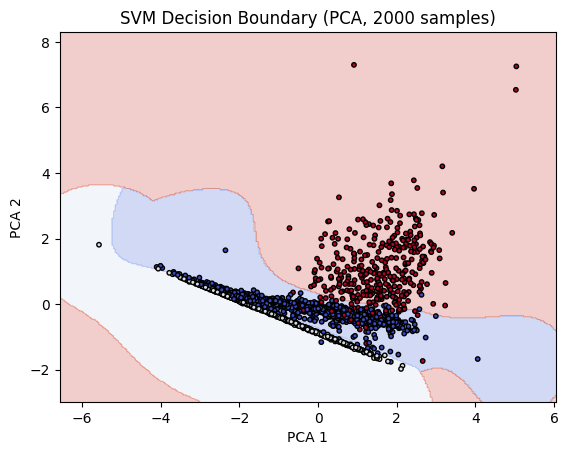

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Sample 2000 random points for visualization
sample_size = 2000
sample_idx = pd.Series(range(X_train.shape[0])).sample(sample_size, random_state=42)
X_train_sample = X_train[sample_idx]
y_train_sample = y_train.iloc[sample_idx]

# PCA to 2D on the sample
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sample)

# Fit SVC on PCA-reduced data
svc_pca = SVC(kernel='rbf', C=10, gamma='scale')
svc_pca.fit(X_train_pca, y_train_sample)

# Mesh grid in PCA space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict and map labels
Z = svc_pca.predict(np.c_[xx.ravel(), yy.ravel()])
label_map = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
Z_numeric = np.array([label_map[label] for label in Z]).reshape(xx.shape)

# Plot boundary and subsampled points
plt.contourf(xx, yy, Z_numeric, alpha=0.25, cmap=plt.cm.coolwarm)
plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train_sample.map(label_map),
    cmap=plt.cm.coolwarm, edgecolors='k', s=10
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary (PCA, 2000 samples)')
plt.show()
